# Sleep EMA Exploratory Data Analysis

Replication Data for Wu et al. (2020) "Multi-Modal Data Collection for Measuring Health, Behavior, and Living Environment of Large-Scale Participant Cohorts: Conceptual Framework and Findings from Deployments": Ecological Momentary Assessment Data (Beiwe)

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [3]:
df = pd.read_csv("data/UT1000_ema_wide.csv")
display(df.head()); df.shape

,pid,survey.date,content,energy,lonely,refreshed,restful,sad,sleep,stress
0,1193rv5x,2019-02-14,3.0,3.0,2.0,2.0,3.0,1.0,5.0,1.0
1,1193rv5x,2019-02-15,2.0,3.0,3.0,1.0,2.0,2.0,6.0,1.0
2,1193rv5x,2019-02-16,1.0,2.0,3.0,1.0,2.0,2.0,9.0,1.0
3,1193rv5x,2019-02-17,1.0,1.0,3.0,2.0,2.0,3.0,9.0,2.0
4,1193rv5x,2019-02-18,3.0,3.0,1.0,1.0,2.0,1.0,5.0,1.0


(31669, 10)

In [4]:
df.describe()

,content,energy,lonely,refreshed,restful,sad,sleep,stress
count,24950.000000,24633.000000,24936.000000,29336.000000,29328.000000,24944.000000,24617.000000,24945.000000
mean,1.573347,1.606747,0.321744,1.717531,1.771856,1.234806,6.345574,1.522309
std,0.863883,0.897869,0.754577,0.790531,0.909771,1.088472,3.592835,1.131327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000
50%,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,6.000000,1.000000
75%,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,8.000000,3.000000
max,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,12.000000,3.000000


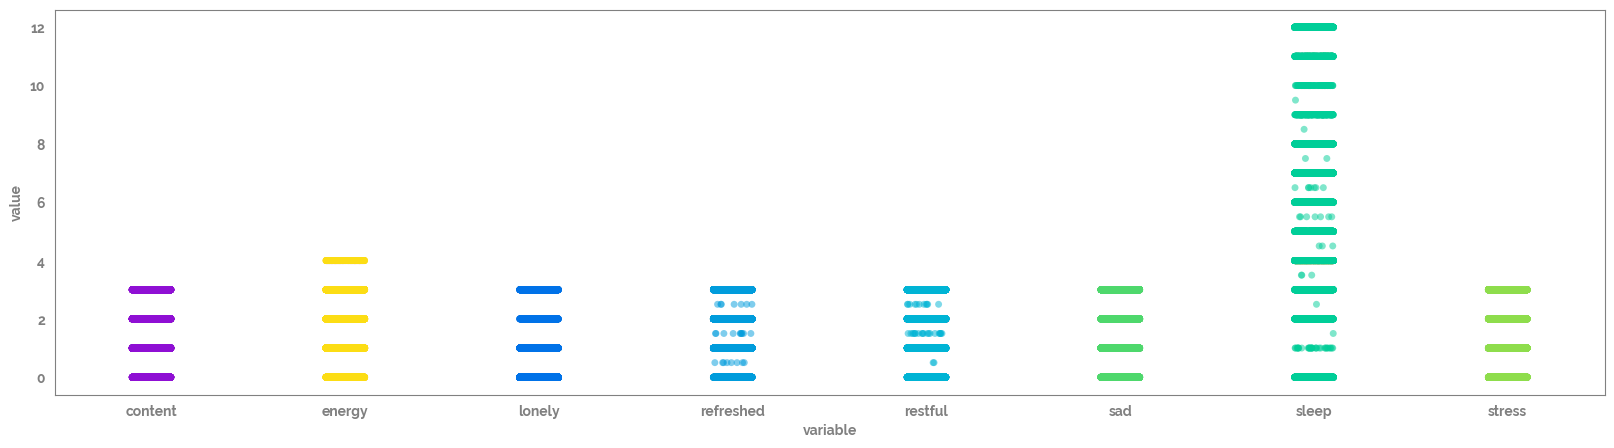

In [11]:
_ = plt.figure(figsize=(20, 5))
_ = sns.stripplot(data=df.select_dtypes(float).melt(), x="variable", y="value", alpha=0.5)

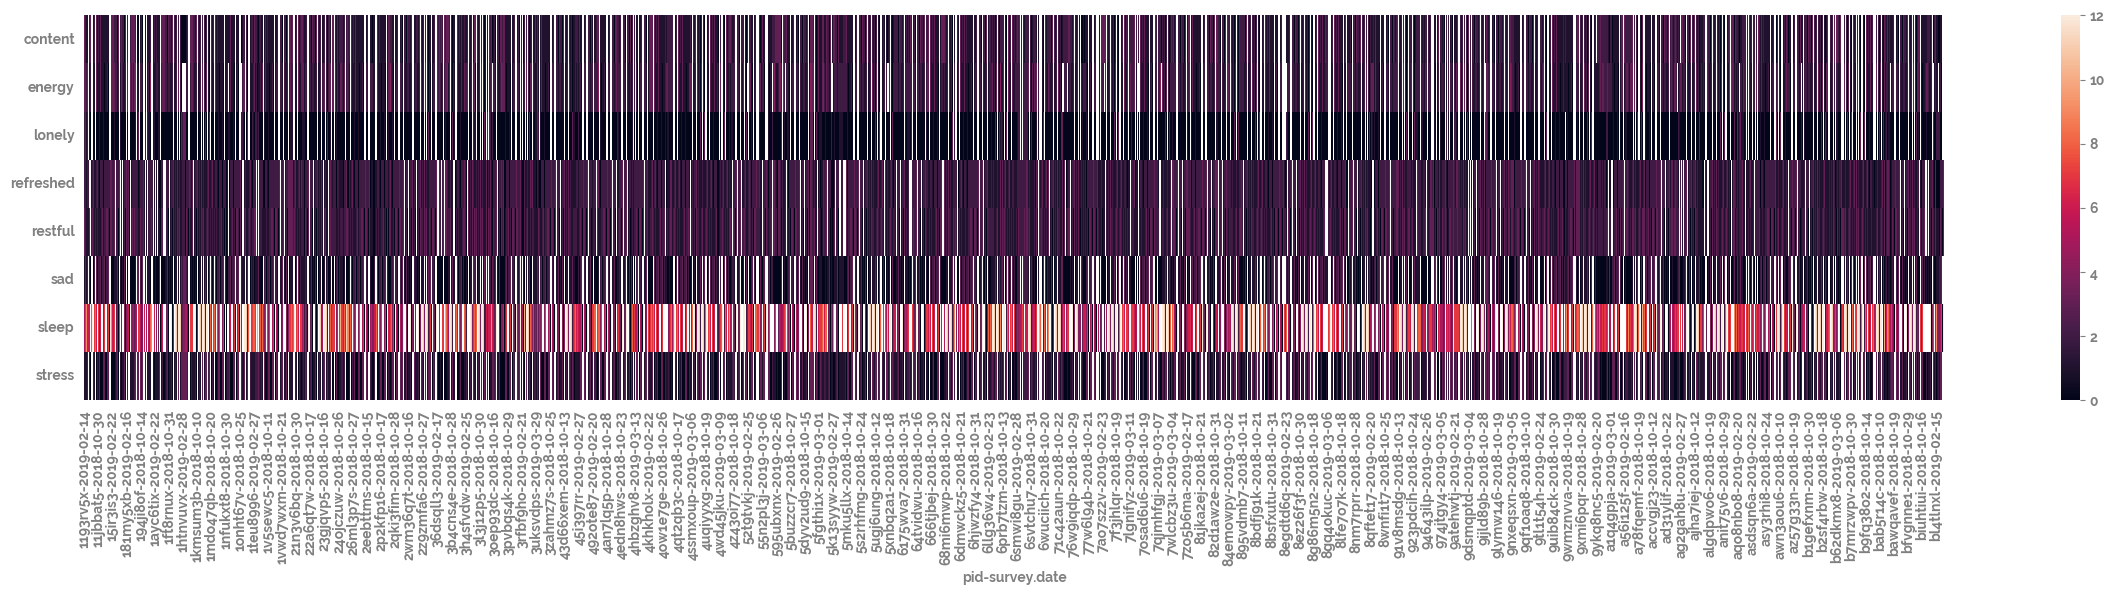

In [12]:
plot_df = df.set_index(["pid", "survey.date"]).head(10000)
_ = plt.figure(figsize=(30, 5))
_ = sns.heatmap(data=plot_df.T)

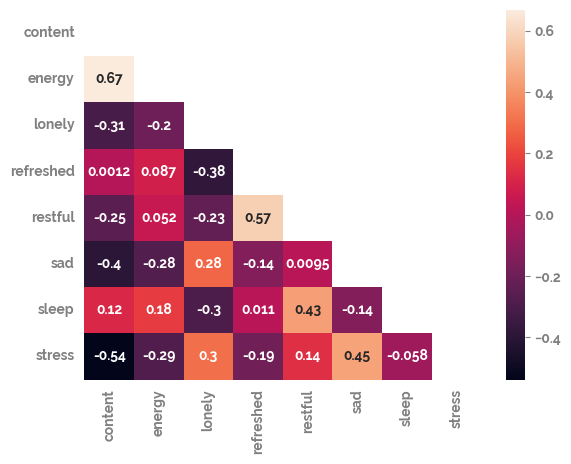

In [13]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
_ = sns.heatmap(df.corr(method="spearman"), mask=mask, annot=True)